In [2]:
import sys

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from utilities import visualize_classifier

In [3]:
# Load input data
input_file = 'data_imbalance.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

In [4]:
# Separate input data into two classes based on labels
class_0 = np.array(X[y==0])
class_1 = np.array(X[y==1])

Text(0.5, 1.0, 'Input data')

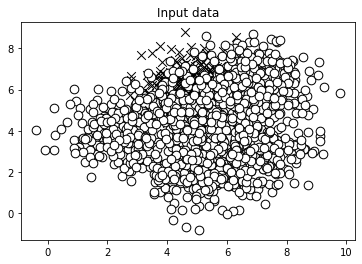

In [6]:
# Visualize input data
plt.figure()
plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='black', linewidth=1, marker='x')
plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolors='white', 
                edgecolors='black', linewidth=1, marker='o')
plt.title('Input data')

In [8]:
#Split data into training and testing datasets 
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=5)

In [10]:
# Extremely Random Forests classifier
params = {'n_estimators': 100, 'max_depth': 4, 'random_state': 0}
if len(sys.argv) > 1:
    if sys.argv[1] == 'balance':
        params = {'n_estimators': 100, 'max_depth': 4, 'random_state': 0, 'class_weight': 'balanced'}
    else:
        raise TypeError("Invalid input argument; should be 'balance'")

TypeError: Invalid input argument; should be 'balance'

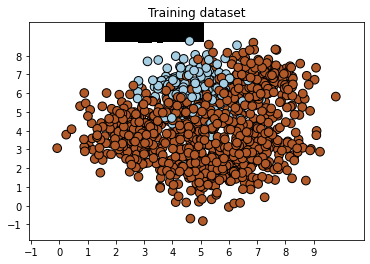

In [11]:
classifier = ExtraTreesClassifier(**params)
classifier.fit(X_train, y_train)
visualize_classifier(classifier, X_train, y_train, 'Training dataset')

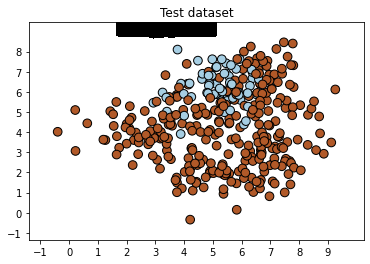

In [12]:
y_test_pred = classifier.predict(X_test)
visualize_classifier(classifier, X_test, y_test, 'Test dataset')

In [13]:
# Evaluate classifier performance
class_names = ['Class-0', 'Class-1']
print("\n" + "#"*40)
print("\nClassifier performance on training dataset\n")
print(classification_report(y_train, classifier.predict(X_train), target_names=class_names))
print("#"*40 + "\n")


########################################

Classifier performance on training dataset

              precision    recall  f1-score   support

     Class-0       1.00      0.01      0.01       181
     Class-1       0.84      1.00      0.91       944

    accuracy                           0.84      1125
   macro avg       0.92      0.50      0.46      1125
weighted avg       0.87      0.84      0.77      1125

########################################

